# Bandwidth search

To find out the optimal bandwidth, `gwlearn` provides a `BandwidthSearch` class, which trains models on a range of bandwidths and selects the most optimal one.

In [5]:
import geopandas as gpd
import numpy as np
import pandas as pd
from geodatasets import get_path
from sklearn import metrics, preprocessing

from gwlearn.ensemble import GWGradientBoostingClassifier, GWRandomForestClassifier
from gwlearn.linear_model import GWLogisticRegression, GWLinearRegression
from gwlearn.search import BandwidthSearch
from gwlearn.undersample import BinaryRandomUnderSampler

Get sample data

In [3]:
gdf = gpd.read_file(get_path("geoda.ncovr")).to_crs(5070)

gdf['point'] = gdf.representative_point()
gdf = gdf.set_geometry('point')

y = gdf["FH90"]
X = gdf.iloc[:, 9:15]

## Interval search

Interval search tests the model at a set interval.

In [ ]:
search = BandwidthSearch(
    GWLinearRegression,
    geometry=gdf.geometry,
    fixed=False,
    n_jobs=-1,
    search_method="interval",
    min_bandwidth=50,
    max_bandwidth=1000,
    interval=100,
    criterion="aicc",
    verbose=True,
)
search.fit(
    X,
    y,
)

Bandwidth: 50.00, aicc: 15666.353
Bandwidth: 150.00, aicc: 15498.936
Bandwidth: 250.00, aicc: 15660.999
Bandwidth: 350.00, aicc: 15775.129
Bandwidth: 450.00, aicc: 15854.287
Bandwidth: 550.00, aicc: 15918.673
Bandwidth: 650.00, aicc: 15975.564
Bandwidth: 750.00, aicc: 16031.276
Bandwidth: 850.00, aicc: 16080.155
Bandwidth: 950.00, aicc: 16126.986


Exception ignored in: <function ResourceTracker.__del__ at 0x106a493a0>
Traceback (most recent call last):
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1071593a0>
Traceback (most recent call last):
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/m

The `scores_` series then contains the AICc, selected as the criterion, which can be plotted to see the change of the model performance as the bandwidth grows.

<Axes: >

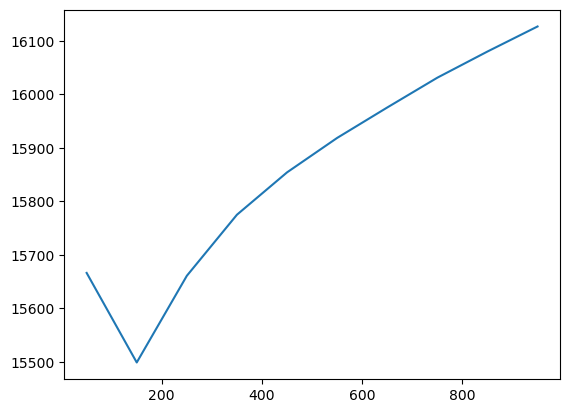

In [9]:
search.scores_.plot()

The optimal bandwidth is then the lowest one.

In [10]:
search.optimal_bandwidth_

np.int64(150)

## Golden section

Alternatively, you can try to use the golden section algorithm that attempts to find the optimal bandwidth iteratively. However, note that there's no guaratnee that it will find the globally optimal bandwidth as it may stick to the local minimum.

In [13]:
search = BandwidthSearch(
    GWLinearRegression,
    geometry=gdf.geometry,
    fixed=True,
    n_jobs=-1,
    search_method="golden_section",
    criterion="aicc",
    min_bandwidth=250_000,
    max_bandwidth=2_000_000,
    verbose=True,
)
search.fit(
    X,
    y,
)

Bandwidth: 918447.5, score: 16135.833
Bandwidth: 1331552.5, score: 16367.508
Bandwidth: 663120.61, score: 15901.394
Bandwidth: 505326.89, score: 15734.258
Bandwidth: 407799.68, score: 15644.228
Bandwidth: 347527.21, score: 15599.261
Bandwidth: 310274.74, score: 15585.033
Bandwidth: 287252.47, score: 15579.996
Bandwidth: 273023.14, score: 15583.440
Bandwidth: 296045.75, score: 15580.453
Bandwidth: 281817.09, score: 15580.952
Bandwidth: 290610.83, score: 15579.452
Bandwidth: 292686.98, score: 15579.549
Bandwidth: 289328.29, score: 15579.566
Bandwidth: 291404.06, score: 15579.440
Bandwidth: 291893.95, score: 15579.458
Bandwidth: 291100.94, score: 15579.438


You can see how the agorithm searches and iteratively gets closer to the optimum.

In [ ]:
search.optimal_bandwidth_

np.float64(291100.9431339667)

Exception ignored in: <function ResourceTracker.__del__ at 0x1034753a0>
Traceback (most recent call last):
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1053f53a0>
Traceback (most recent call last):
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/martin/dev/pysal/gwlearn/.pixi/envs/default/lib/python3.12/m

## Other metrics

By default, `BandwidthSearch` computes AICc, AIC and BIC, available through `metrics_`.

In [21]:
search.metrics_

,aicc,aic,bic
9.184475e+05,16135.832631,16132.605473,16556.503755
1.331552e+06,16367.507618,16366.574492,16597.123551
6.631206e+05,15901.393868,15891.545192,16623.552420
5.053269e+05,15734.258373,15708.559009,16874.775997
4.077997e+05,15644.228226,15588.888391,17273.283311
3.475272e+05,15599.260550,15500.960777,17709.892539
3.102747e+05,15585.032697,15436.700466,18110.784586
2.872525e+05,15579.995539,15383.747794,18423.649729
2.730231e+05,15583.440146,15347.827157,18650.241701
2.960457e+05,15580.452736,15404.583147,18296.148267
